In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/My Drive/house/data_frames/housing.csv')

In [ ]:
data.shape

(2582, 270)

In [ ]:
data.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'total_returns', 'adj_gross_inc', 'agi_per_ret', 'perc_business_ret',
       'perc_farm_ret', 'perc_umemp_ret', 'perc_ssn_benefits',
       'perc_student_loans', 'perc_child_credits', 'Perc_earned_inc_tax'],
      dtype='object', length=270)

In [5]:
df_lasso = data.drop('PID', axis=1)

In [6]:
X = df_lasso.drop("SalePrice", axis=1)
y = df_lasso["SalePrice"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [10]:
alpha = 50

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=50)

In [11]:
y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 13821.883371522743


In [32]:
y_pred = lasso.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 13203.698088846833


In [12]:
important_features = [feature for feature, coef in zip(X.columns, lasso.coef_) if coef != 0]
print("Important features:", important_features)

Important features: ['GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolQC', 'Fence', 'MoSold', 'YrSold', 'MSSubClass_20', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_C (all)', 'MSZoning_RL', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'LotShape_IR1', 'LotShape_IR2', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_

In [21]:
important_features_coef = [coef for feature, coef in zip(X.columns, lasso.coef_) if coef != 0]

In [23]:
len(important_features_coef)

123

In [24]:
feature_importance = pd.DataFrame(
    {'Feature':important_features,
     'Coefficient': important_features_coef   
    }
)

In [25]:
feature_importance

,Feature,Coefficient
0,GrLivArea,126847.771679
1,OverallQual,61862.439857
2,OverallCond,29254.217577
3,YearBuilt,6043.746112
4,YearRemodAdd,3401.207540
...,...,...
118,SaleCondition_Family,-11733.641905
119,SaleCondition_Normal,4296.642195
120,SaleCondition_Partial,10766.577888
121,TtlVal_AsrYr,276982.920203


In [26]:
sorted_features = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)

In [29]:
sorted_features.head(5)

,Feature,Coefficient
121,TtlVal_AsrYr,276982.920203
0,GrLivArea,126847.771679
77,Condition2_PosN,-76082.131543
1,OverallQual,61862.439857
76,Condition2_PosA,45875.423242


In [17]:
X.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'total_returns', 'adj_gross_inc', 'agi_per_ret', 'perc_business_ret',
       'perc_farm_ret', 'perc_umemp_ret', 'perc_ssn_benefits',
       'perc_student_loans', 'perc_child_credits', 'Perc_earned_inc_tax'],
      dtype='object', length=268)

In [19]:
lasso.coef_

array([ 1.26847772e+05,  0.00000000e+00,  0.00000000e+00,  6.18624399e+04,
        2.92542176e+04,  6.04374611e+03,  3.40120754e+03,  3.89569578e+04,
        2.07454571e+04, -0.00000000e+00,  4.08701771e+03, -8.54579888e+03,
        1.54578298e+04, -1.69215765e+02,  3.39031288e+04,  0.00000000e+00,
        8.44210149e+03, -0.00000000e+00,  1.49585545e+04,  6.12351840e+03,
        0.00000000e+00,  8.65946991e+03,  0.00000000e+00,  5.93883363e+03,
        0.00000000e+00,  0.00000000e+00,  2.65856774e+03, -7.41989845e+03,
        0.00000000e+00,  1.61126077e+04,  2.76434601e+03,  2.34901014e+04,
        1.80778465e+04,  0.00000000e+00, -0.00000000e+00,  5.46403213e+03,
        1.74900432e+04, -0.00000000e+00, -0.00000000e+00,  1.16406638e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.61156841e+04,
       -0.00000000e+00,  1.45433411e+04,  5.01653723e+01, -0.00000000e+00,
       -1.37008466e+03, -1.03676204e+03,  3.13580541e+03, -0.00000000e+00,
       -0.00000000e+00,  

In [16]:
feature_importance = pd.DataFrame({
    'Feature': X.columns for feature, coef in zip(X.columns, lasso.coef_),
    'Coefficient': lasso.coef_
})


SyntaxError: ignored

In [ ]:
len(important_features)

123

In [ ]:
data[['YearRemodAdd']]

,YearRemodAdd
0,1950
1,1984
2,2007
3,2003
4,2001
...,...
2577,1950
2578,1955
2579,1950
2580,2000


In [ ]:
df = data.drop('PID',axis=1)

In [ ]:
df = df[important_features + ['SalePrice']]

In [ ]:
df

,GrLivArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,...,PavedDrive_Y,SaleType_ConLD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TtlVal_AsrYr,agi_per_ret,SalePrice
0,856,6,6,1939,1950,0.0,3,3,3,1,...,1,0,1,0,0,1,0,149000.000000,73571.327182,126000
1,1049,5,5,1984,1984,149.0,4,4,3,2,...,1,0,1,0,0,1,0,174100.000000,77236.460177,139500
2,1001,5,9,1930,2007,0.0,4,3,3,1,...,0,0,1,0,0,1,0,164300.000000,73571.327182,124900
3,1039,4,8,1900,2003,0.0,4,2,3,1,...,0,0,1,0,0,1,0,124400.000000,73571.327182,114000
4,1665,8,6,2001,2001,0.0,4,4,3,1,...,1,0,1,0,0,1,0,257100.000000,73571.327182,227000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,952,6,6,1916,1950,0.0,3,3,3,1,...,0,0,1,0,0,1,0,138500.000000,73571.327182,121000
2578,1733,3,5,1955,1955,0.0,3,0,0,0,...,1,0,1,0,0,1,0,185100.000000,77236.460177,139600
2579,2002,5,6,1949,1950,0.0,3,3,3,1,...,1,0,1,0,0,1,0,221337.445022,75180.309062,145000
2580,1842,7,5,2000,2000,144.0,4,4,3,1,...,1,0,1,0,0,1,0,265200.000000,77236.460177,217500


In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(83, activation='relu', input_shape=(123,)))
model.add(keras.layers.Dense(83, activation='relu'))
model.add(keras.layers.Dense(1))

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss=MeanSquaredError(),metrics=['mae'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min', verbose=1)

In [ ]:
history = model.fit(X_train, y_train, epochs=6000, batch_size=64, validation_split=0.2)

Streaming output truncated to the last 5000 lines.
26/26 [==============================] - 0s 5ms/step - loss: 187807008.0000 - mae: 9412.4766 - val_loss: 472514240.0000 - val_mae: 12689.0752
Epoch 3502/6000
26/26 [==============================] - 0s 5ms/step - loss: 187434704.0000 - mae: 9411.5215 - val_loss: 472842400.0000 - val_mae: 12682.2871
Epoch 3503/6000
26/26 [==============================] - 0s 5ms/step - loss: 187862512.0000 - mae: 9407.2861 - val_loss: 474014272.0000 - val_mae: 12788.2832
Epoch 3504/6000
26/26 [==============================] - 0s 5ms/step - loss: 188680400.0000 - mae: 9438.1494 - val_loss: 473152224.0000 - val_mae: 12746.2188
Epoch 3505/6000
26/26 [==============================] - 0s 5ms/step - loss: 187520416.0000 - mae: 9422.2861 - val_loss: 472744416.0000 - val_mae: 12696.5244
Epoch 3506/6000
26/26 [==============================] - 0s 5ms/step - loss: 186898848.0000 - mae: 9390.5498 - val_loss: 473248224.0000 - val_mae: 12738.4004
Epoch 3507/6000
2

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

17/17 [==============================] - 0s 2ms/step
Mean Absolute Error: 14015.752931576402


In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
hist['epoch'] = history.epoch

In [ ]:
hist

,loss,mae,val_loss,val_mae,epoch
0,3.758908e+10,177786.578125,3.606101e+10,177421.828125,0
1,3.758062e+10,177763.421875,3.604423e+10,177375.828125,1
2,3.754921e+10,177678.203125,3.599292e+10,177234.937500,2
3,3.747015e+10,177463.656250,3.587984e+10,176924.031250,3
4,3.731558e+10,177037.515625,3.567375e+10,176355.953125,4
...,...,...,...,...,...
2995,2.387697e+08,10386.867188,4.677786e+08,12944.836914,2995
2996,2.389488e+08,10398.130859,4.682433e+08,12992.738281,2996
2997,2.386132e+08,10361.023438,4.686691e+08,12997.216797,2997
2998,2.389136e+08,10407.131836,4.677820e+08,12965.449219,2998


Text(0.5, 1.0, 'Training History of Deep Learning')

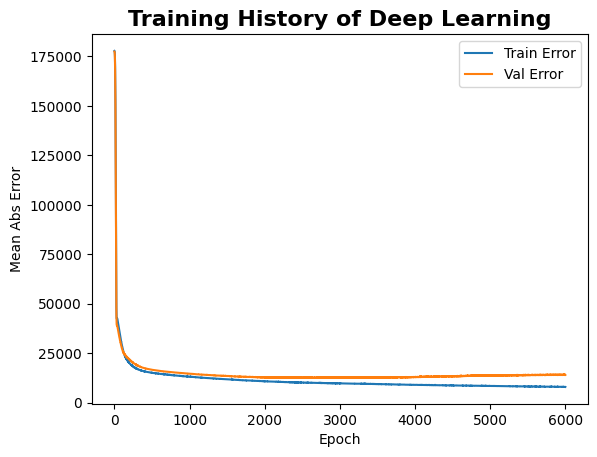

In [ ]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'],hist['mae'],label='Train Error')
plt.plot(hist['epoch'],hist['val_mae'],label='Val Error')
plt.legend()
plt.title("Training History of Deep Learning", fontsize=16, fontweight='bold')

In [ ]:
plt.plot()

In [ ]:
df = data.copy()

In [ ]:
df = df[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','YrSold','SalePrice']]

In [ ]:
df

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
0,1939,0,856,1,0,2,4,2010,126000
1,1984,0,1049,2,0,2,5,2009,139500
2,1930,0,1001,1,0,2,5,2007,124900
3,1900,322,1039,1,0,2,6,2009,114000
4,2001,855,1665,2,1,3,6,2009,227000
...,...,...,...,...,...,...,...,...,...
2577,1916,0,952,1,0,2,4,2009,121000
2578,1955,0,1733,2,0,4,8,2009,139600
2579,1949,1001,2002,2,0,4,8,2007,145000
2580,2000,857,1842,2,1,3,7,2007,217500


In [ ]:
df.describe()

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
count,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000
mean,1970.290473,337.017816,1486.218823,1.550349,0.378776,2.849729,6.387684,2007.836948,178071.970565
std,29.720160,423.967580,488.503095,0.545829,0.499344,0.822884,1.534686,1.312822,75003.324773
min,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,12789.000000
25%,1953.000000,0.000000,1112.000000,1.000000,0.000000,2.000000,5.000000,2007.000000,130000.000000
50%,1972.000000,0.000000,1436.000000,2.000000,0.000000,3.000000,6.000000,2008.000000,159900.000000
75%,1999.000000,702.750000,1733.000000,2.000000,1.000000,3.000000,7.000000,2009.000000,209500.000000
max,2010.000000,1872.000000,4676.000000,4.000000,2.000000,6.000000,13.000000,2010.000000,755000.000000


In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
b

In [ ]:
X_test

array([[0.87681159, 0.        , 0.19714417, ..., 0.5       , 0.36363636,
        0.75      ],
       [0.92028986, 0.60042735, 0.43298019, ..., 0.5       , 0.54545455,
        0.        ],
       [0.39130435, 0.        , 0.13127591, ..., 0.33333333, 0.18181818,
        0.75      ],
       ...,
       [0.97101449, 0.45405983, 0.25886688, ..., 0.5       , 0.36363636,
        0.25      ],
       [0.94202899, 0.        , 0.26715799, ..., 0.5       , 0.36363636,
        0.5       ],
       [0.95652174, 0.        , 0.3021649 , ..., 0.33333333, 0.27272727,
        0.5       ]])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))

learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error',metrics=['mae'])

In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_split=0.2)

Epoch 1/1000
26/26 [==============================] - 0s 7ms/step - loss: 4.1273 - mae: 155192.4062 - val_loss: 4.0741 - val_mae: 154349.0000
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 4.0501 - mae: 154750.6406 - val_loss: 3.9975 - val_mae: 153900.5156
Epoch 3/1000
26/26 [==============================] - 0s 4ms/step - loss: 3.9743 - mae: 154305.9531 - val_loss: 3.9224 - val_mae: 153447.5469
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 3.9000 - mae: 153855.2031 - val_loss: 3.8487 - val_mae: 152990.4219
Epoch 5/1000
26/26 [==============================] - 0s 4ms/step - loss: 3.8270 - mae: 153401.6719 - val_loss: 3.7764 - val_mae: 152528.7344
Epoch 6/1000
26/26 [==============================] - 0s 5ms/step - loss: 3.7554 - mae: 152943.1719 - val_loss: 3.7054 - val_mae: 152062.2188
Epoch 7/1000
26/26 [==============================] - 0s 5ms/step - loss: 3.6850 - mae: 152480.7812 - val_loss: 3.6356 - val_mae: 151590.5000
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_data = np.array([[0.39130435, 0.        , 0.13127591, 0.25      , 0.        ,
       0.33333333, 0.18181818, 0.75      ]])

In [ ]:
X_test[2]

array([0.39130435, 0.        , 0.13127591, 0.25      , 0.        ,
       0.33333333, 0.18181818, 0.75      ])

In [ ]:
model.predict(new_data)

1/1 [==============================] - 0s 21ms/step


array([[117541.01]], dtype=float32)

In [ ]:
y_test

809     166000
1446    268500
761     119000
318     128500
961     210000
         ...  
1027    200100
1010    156500
25      168165
1285    221000
1712    275000
Name: SalePrice, Length: 517, dtype: int64

In [ ]:
X_test

array([[0.87681159, 0.        , 0.19714417, ..., 0.5       , 0.36363636,
        0.75      ],
       [0.92028986, 0.60042735, 0.43298019, ..., 0.5       , 0.54545455,
        0.        ],
       [0.39130435, 0.        , 0.13127591, ..., 0.33333333, 0.18181818,
        0.75      ],
       ...,
       [0.97101449, 0.45405983, 0.25886688, ..., 0.5       , 0.36363636,
        0.25      ],
       [0.94202899, 0.        , 0.26715799, ..., 0.5       , 0.36363636,
        0.5       ],
       [0.95652174, 0.        , 0.3021649 , ..., 0.33333333, 0.27272727,
        0.5       ]])

In [ ]:
mse = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 2820615936.0000


In [ ]:
mse

2820615936.0

In [ ]:
new_data = scaler.transform(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_data

array([[0.93478261, 0.45673077, 0.30654076, 0.5       , 0.5       ,
        0.5       , 0.36363636, 0.75      ]])

In [ ]:
model.predict(new_data)

1/1 [==============================] - 0s 26ms/step


array([[227439.48]], dtype=float32)

In [ ]:
df1 = data.copy()

In [ ]:
df1 = df1.drop('PID', axis=1)

In [ ]:
df1

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
0,856,126000,68.516053,7890,6,6,1939,1950,0.0,3,...,14090.000000,1.036620e+06,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
1,1049,139500,42.000000,4235,5,5,1984,1984,149.0,4,...,11300.000000,8.727720e+05,77236.460177,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
2,1001,124900,60.000000,6060,5,9,1930,2007,0.0,4,...,14090.000000,1.036620e+06,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
3,1039,114000,80.000000,8146,4,8,1900,2003,0.0,4,...,14090.000000,1.036620e+06,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
4,1665,227000,70.000000,8400,8,6,2001,2001,0.0,4,...,14090.000000,1.036620e+06,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,952,121000,68.516053,8854,6,6,1916,1950,0.0,3,...,14090.000000,1.036620e+06,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
2578,1733,139600,68.516053,13680,3,5,1955,1955,0.0,3,...,11300.000000,8.727720e+05,77236.460177,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
2579,2002,145000,82.000000,6270,5,6,1949,1950,0.0,3,...,12778.271309,9.581146e+05,75180.309062,0.021022,0.014220,0.134879,0.046541,0.108049,0.006515,0.002067
2580,1842,217500,68.516053,8826,7,5,2000,2000,144.0,4,...,11300.000000,8.727720e+05,77236.460177,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735


In [ ]:
X = df1.drop('SalePrice', axis=1)
y = df1['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(268, activation='relu', input_shape=(268,)))
model.add(keras.layers.Dense(268, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 3s 14ms/step - loss: 124.8829 - val_loss: 84.9941
Epoch 2/100
26/26 [==============================] - 0s 7ms/step - loss: 64.9512 - val_loss: 50.7576
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 44.0525 - val_loss: 38.4686
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 34.8790 - val_loss: 31.6464
Epoch 5/100
26/26 [==============================] - 0s 7ms/step - loss: 29.2290 - val_loss: 27.0070
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 25.2363 - val_loss: 23.5955
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 22.2127 - val_loss: 20.9259
Epoch 8/100
26/26 [==============================] - 0s 8ms/step - loss: 19.8031 - val_loss: 18.7617
Epoch 9/100
26/26 [==============================] - 0s 7ms/step - loss: 17.8324 - val_loss: 16.9809
Epoch 10/100
26/26 [==============================] - 0s 7ms/step - loss: 16.1968 - val_l

In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
hist

,loss,val_loss
0,97.796585,66.337242
1,55.171753,46.492065
2,41.566326,37.228935
3,34.118919,31.234934
4,28.997488,26.904093
5,25.201649,23.609268
6,22.266285,21.010641
7,19.899742,18.851484
8,17.902672,17.017118
9,16.200682,15.444719
